In [8]:
import pandas as pd
import numpy as np
import spacy
import seaborn as sns
import string
import matplotlib.pyplot as plt
import random
from spacy.lang.pt.stop_words import STOP_WORDS
from spacy.training import Example
from sklearn.metrics import confusion_matrix,accuracy_score

In [9]:
spacy.__version__

'3.8.2'

In [10]:
pln = spacy.load('pt_core_news_lg')

In [11]:
df_text_train = pd.read_csv('../Bases de dados/base_treinamento.txt',encoding='utf-8')

In [12]:
df_text_train.shape

(196, 2)

In [13]:
df_text_train.head(), df_text_train.tail()

(                             texto   emocao
 0        este trabalho é agradável  alegria
 1  gosto de ficar no seu aconchego  alegria
 2       fiz a adesão ao curso hoje  alegria
 3       eu sou admirada por muitos  alegria
 4                  adoro como você  alegria,
                                                  texto emocao
 191  estou chocado e amedrontado com este assassina...   medo
 192  é preciso afugenta com ímpeto este medo do inf...   medo
 193  políticos usam suas forças para afugentar e am...   medo
 194       o objetivo disso e apenas me amedrontar mais   medo
 195                                    isso me apavora   medo)

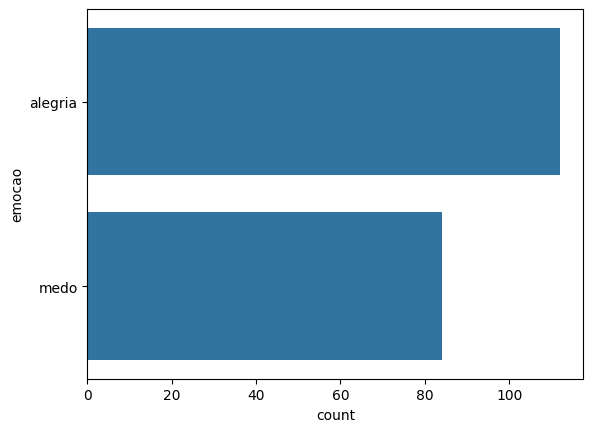

In [14]:
sns.countplot(df_text_train['emocao'], label='Count');

In [15]:
punctation = string.punctuation
punctation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
stop_words = STOP_WORDS

In [17]:
stop_words

{'a',
 'acerca',
 'ademais',
 'adeus',
 'agora',
 'ainda',
 'algo',
 'algumas',
 'alguns',
 'ali',
 'além',
 'ambas',
 'ambos',
 'antes',
 'ao',
 'aos',
 'apenas',
 'apoia',
 'apoio',
 'apontar',
 'após',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aqui',
 'aquilo',
 'as',
 'assim',
 'através',
 'atrás',
 'até',
 'aí',
 'baixo',
 'bastante',
 'bem',
 'boa',
 'bom',
 'breve',
 'cada',
 'caminho',
 'catorze',
 'cedo',
 'cento',
 'certamente',
 'certeza',
 'cima',
 'cinco',
 'coisa',
 'com',
 'como',
 'comprida',
 'comprido',
 'conhecida',
 'conhecido',
 'conselho',
 'contra',
 'contudo',
 'corrente',
 'cuja',
 'cujo',
 'custa',
 'cá',
 'da',
 'daquela',
 'daquele',
 'dar',
 'das',
 'de',
 'debaixo',
 'demais',
 'dentro',
 'depois',
 'des',
 'desde',
 'dessa',
 'desse',
 'desta',
 'deste',
 'deve',
 'devem',
 'deverá',
 'dez',
 'dezanove',
 'dezasseis',
 'dezassete',
 'dezoito',
 'diante',
 'direita',
 'disso',
 'diz',
 'dizem',
 'dizer',
 'do',
 'dois',
 'dos',
 'doze',
 'duas',
 'dá

In [18]:
len(stop_words)

416

In [19]:
pln

In [20]:
def preprocessing(text):
    text = text.lower()
    document = pln(text)
    list_preprocessing =[]
    for token in document:
        list_preprocessing.append(token.lemma_)
        
    list_preprocessing = [word for word  in list_preprocessing if word not in stop_words and word not in punctation]
    list_preprocessing = ' '.join([str(element)for element in list_preprocessing if not element.isdigit()])

    return list_preprocessing

In [21]:
list_result = preprocessing('Estou aprendendo 1 10 23 processamento de linguagem natural, curso em Curitiba')
list_result

'aprender processamento linguagem natural curso curitiba'

In [22]:
df_text_train['texto'] = df_text_train['texto'].apply(preprocessing)

In [23]:
df_text_train

,texto,emocao
0,trabalho agradável,alegria
1,gostar ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirado,alegria
4,adorar,alegria
...,...,...
191,chocado amedrontar assassinato brutal,medo
192,preciso afugentar ímpeto medo de o inferno,medo
193,político força afugentar amedrontar,medo
194,objetivo de isso amedrontar,medo


In [24]:
df_text_train_end = []
for text,emotion in zip(df_text_train['texto'],df_text_train['emocao']):
    if emotion == 'alegria':
        dic = ({"ALEGRIA":True,"MEDO":False})
    else:
        dic = ({"ALEGRIA":False,"MEDO":True})

    df_text_train_end.append([text,dic.copy()])

In [25]:
df_text_train_end

[['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gostar ficar em o aconchego', {'ALEGRIA': True, 'MEDO': False}],
 ['fiz adesão a o curso hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirado', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelo macio', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cor de o olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somo amável outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixoneer', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animado', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto hoje', {'ALEGRIA':

In [26]:
type(df_text_train_end[0][1])

dict

In [27]:
model = spacy.blank('pt')
model_categori = model.add_pipe('textcat')
model_categori.add_label('ALEGRIA')
model_categori.add_label('MEDO')
historic = []

In [28]:
model.initialize()
for era in range(1000):
    random.shuffle(df_text_train_end)
    losses ={}
    for batch in spacy.util.minibatch(df_text_train_end,30):
        text = [model(text) for text,entities in batch]
        annotations = [{'cats':entities} for text, entities in batch]
        examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
            text, annotations
        )]
        model.update(examples,losses=losses)
    if era % 100 == 0:
        print(losses)
        historic.append(losses)

{'textcat': 1.716694638133049}
{'textcat': 2.941288835753286e-11}
{'textcat': 3.992010579522906e-12}
{'textcat': 1.0107846160002827e-12}
{'textcat': 3.6228089586142886e-13}
{'textcat': 1.4776651124627721e-13}
{'textcat': 7.22028671931458e-14}
{'textcat': 3.5706102779540345e-14}
{'textcat': 1.963299901359207e-14}
{'textcat': 9.79906370415372e-15}


In [29]:
historic_loss=[]
for i in historic:
    historic_loss.append(i.get('textcat'))

historic_loss = np.array(historic_loss)

Text(0, 0.5, 'Error')

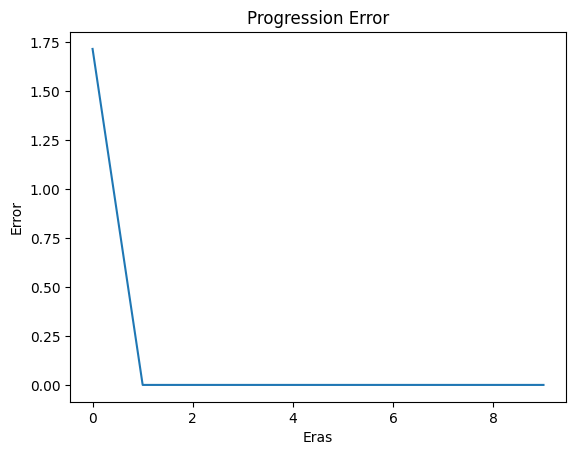

In [30]:
plt.plot(historic_loss)
plt.title('Progression Error')
plt.xlabel('Eras')
plt.ylabel('Error')

In [31]:
model.to_disk('model')

In [32]:
model_carring = spacy.load('model')
model_carring

In [33]:
positive_text = 'eu adoro a cor dos seus olhos'
negative_text ='estou com medo dele'

In [34]:
positive_text = preprocessing(positive_text)
positive_text

'adorar cor de o olho'

In [35]:
predict = model_carring(positive_text)
predict.cats

{'ALEGRIA': 1.0, 'MEDO': 1.5346444115493796e-08}

In [36]:
predict=model_carring(preprocessing(negative_text))
predict.cats,preprocessing(negative_text) 

({'ALEGRIA': 8.63591083088977e-08, 'MEDO': 0.9999998807907104}, 'medo de ele')

In [37]:
predictions=[]
for text in df_text_train['texto']:
    print(preprocessing(text))
    predict = model_carring(preprocessing(text))
    predictions.append(predict.cats)

trabalho agradável
gostar ficar aconchego
fiz adesão curso hoje
admirar
adorar
adorar cabelo macio
adorar cor olho
somo amável outro
sintar afeição
querer agradar filho
sinto completamente amar
amar
alívio
dor amenizar finalmente
achar Apaixoneer
amar maravilhoso
sentir animar
sintar hoje
luar belo
dia bonito
afortunar
maravilha mundo
recebi carinho hoje colega
sentir reconfortar hoje
amigo
contente resultado teste
pintura brilhante
água abundâncio
roupa delicado
comediante
bondader vir
amor lir
amizade durar
eufórico notícia
realmente fiel
festa comemorar aniversário
graças deus enxerguei certo
escolha
incrível Belo
engraçar explicar
emocionante
cativar olhar
loucamente apaixonar
dúvida
rodear abraço
vejo estrela
sintar sol
sorrir orelha orelho
valer pena
finalmente colocar amor
dançar noite adentro
amor brilhante
toquar coração durante
amigo companheiro
trazer volto vida
sonho doce
adorar doce fruta
suco favorito
agradecer ajudar
enorme prazer equipe
trabalhar equipe
sinto flutuar ar

In [38]:
predictions

[{'ALEGRIA': 1.0, 'MEDO': 5.510107481399018e-09},
 {'ALEGRIA': 0.9999996423721313, 'MEDO': 3.813693467691337e-07},
 {'ALEGRIA': 1.0, 'MEDO': 2.5360664679396905e-08},
 {'ALEGRIA': 0.9999879598617554, 'MEDO': 1.2059251275786664e-05},
 {'ALEGRIA': 1.0, 'MEDO': 2.1905239844244306e-09},
 {'ALEGRIA': 1.0, 'MEDO': 7.868603546512531e-09},
 {'ALEGRIA': 1.0, 'MEDO': 8.414162699921235e-09},
 {'ALEGRIA': 1.0, 'MEDO': 8.131459949822784e-09},
 {'ALEGRIA': 0.9999994039535522, 'MEDO': 5.481095399773039e-07},
 {'ALEGRIA': 1.0, 'MEDO': 5.860092144871487e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.7095328647419592e-08},
 {'ALEGRIA': 1.0, 'MEDO': 8.618826541351154e-09},
 {'ALEGRIA': 1.0, 'MEDO': 3.165051776221617e-09},
 {'ALEGRIA': 1.0, 'MEDO': 3.75171076427705e-08},
 {'ALEGRIA': 0.9993778467178345, 'MEDO': 0.0006221641087904572},
 {'ALEGRIA': 1.0, 'MEDO': 1.0488706791988989e-08},
 {'ALEGRIA': 0.9999997615814209, 'MEDO': 2.1424978058348643e-07},
 {'ALEGRIA': 1.0, 'MEDO': 2.7869397456470324e-08},
 {'ALEGRIA': 0.9999

In [39]:
predict_ =[]

for predict_i in predictions:
    if predict_i['ALEGRIA'] > predict_i['MEDO']:
        predict_.append('alegria')
    else:
         predict_.append('medo')

In [40]:
predict_

['alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'medo',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegr

In [41]:
true_ansewears = df_text_train['emocao'].values
true_ansewears

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [42]:
accuracy_score(true_ansewears,predict_)

0.9846938775510204

In [43]:
print(confusion_matrix(true_ansewears,predict_))

[[111   1]
 [  2  82]]


In [44]:
df_text_test = pd.read_csv('../Bases de dados/base_teste.txt')
df_text_test

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria
...,...,...
79,fui notificado e estou com medo de perder a gu...,medo
80,estou angustiada com meus filhos na rua,medo
81,e abominável o que fazem com os animais,medo
82,foi terrível o tigre quase o matou,medo


In [45]:
df_text_test['texto'] = df_text_test['texto'].apply(preprocessing)
df_text_test

,texto,emocao
0,precisei pagar ingresso,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar,alegria
3,afortunado,alegria
4,benéfico medida,alegria
...,...,...
79,notificar medo perder guarda de o filha,medo
80,angustiado filho em o rua,medo
81,abominável animal,medo
82,terrível tigre quase matar,medo


In [46]:
predictions=[]
for text in df_text_test['texto']:
    print(preprocessing(text))
    predict = model_carring(preprocessing(text))
    predictions.append(predict.cats)

precisei pagar ingresso
ajeitar ficar
fortuna ultrapassar
afortunar
benéfico medida
ficar lindo
achar sapato simpático
ansioso chegada
congratulação aniversário
delicadamente colocar dormir
música lir
música vivar
concluírr tarefa difícil
concluírr graduação
contente
confiar
prazer conhecê lo
coleguismo animador
aproveitar féria
aproveitar féria
divertido jogo
diversão
achar divertir
consentir orçamento cliente
consentimento pai casar
adorar perfume
bondade cativante
despreocupar
preocupar acontecer
sinto completamente seguro
estimar trabalho
estimar família
concretizar ideia
ideal alcançar
feliz junto
animar preparativo casamento
amar filho
apaixonar sãoo maravilhoso
agradeçar imensamente dia
comida parecer atraente
completar
completar projeto hoje
namorar
namorar vestir
pude comprar celular hoje
deleite compartilhar vitória
garota
útimo show
abominável monstro
alarmar situação
amedrontar
medo noite
ameaçar dia
angústiar
angustiar
angustiadamente sair casa
deixar apavorar
apavorar
des

In [47]:
predict_ =[]

for predict_i in predictions:
    if predict_i['ALEGRIA'] > predict_i['MEDO']:
        predict_.append('alegria')
    else:
         predict_.append('medo')

In [48]:
true_ansewears = df_text_test['emocao'].values
true_ansewears

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo'], dtype=object)

In [49]:
accuracy_score(true_ansewears,predict_)

0.5952380952380952

In [50]:
print(confusion_matrix(true_ansewears,predict_))

[[34 14]
 [20 16]]
